In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import getcwd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from function import *

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"

Chargement des données...


In [3]:
file_name = 'cars_acceleration_regression_simple.xlsx'

df_origin = pd.read_excel(file_path+file_name)

print("Chargement des données", df_origin.shape, ".... ...................................... END")

Chargement des données (230, 2) .... ...................................... END


In [4]:
df = df_origin.copy()

In [5]:
df.columns

Index(['horesepower', 'acceleration'], dtype='object')

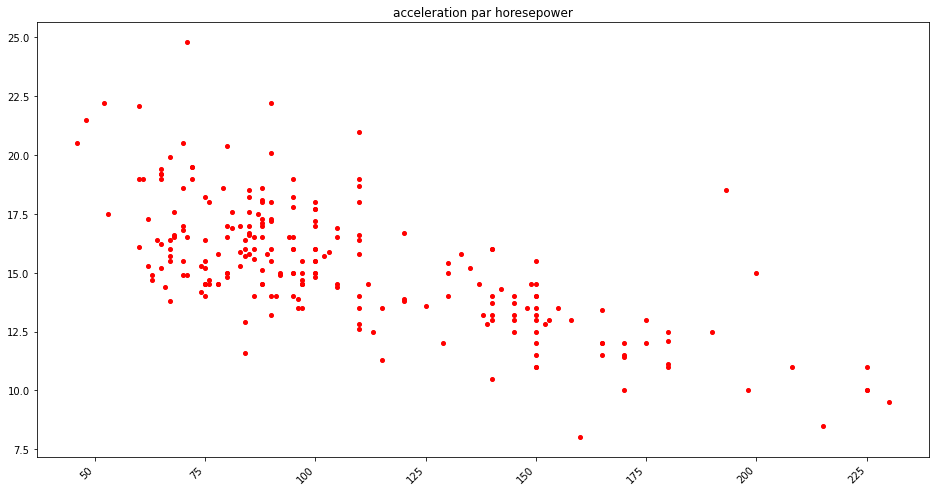

In [8]:
figure, axe = color_graph_background(1,1)
col_x = 'horesepower'
col_y = 'acceleration'
plt.plot(df[col_x], df[col_y], 'ro', markersize=4)
plt.title(col_y + ' par '+col_x)
figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.show()

In [9]:
X = np.matrix([np.ones(df.shape[0]), df[col_x]]).T
X[:10]

matrix([[  1., 140.],
        [  1.,  67.],
        [  1.,  68.],
        [  1.,  81.],
        [  1.,  97.],
        [  1., 140.],
        [  1.,  79.],
        [  1.,  88.],
        [  1.,  95.],
        [  1.,  80.]])

In [10]:
y = np.matrix(df[col_y]).T
y[:10]

matrix([[16. ],
        [16. ],
        [16.6],
        [16.9],
        [15. ],
        [16. ],
        [18.6],
        [17. ],
        [17.8],
        [15. ]])

In [11]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

matrix([[20.27567289],
        [-0.04639186]])

In [12]:
print(theta.item(0) + theta.item(1) * 100)

15.636486637038796


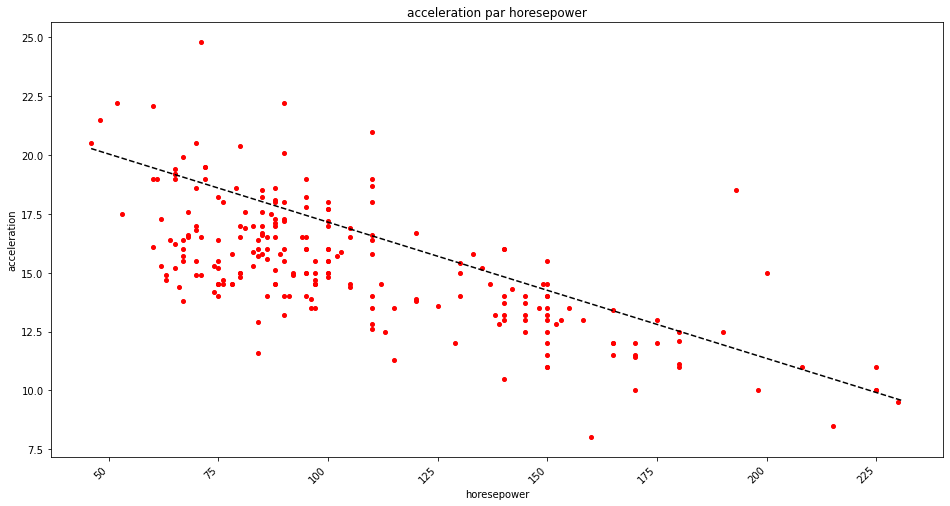

In [13]:
figure, axe = color_graph_background(1,1)

plt.xlabel(col_x)
plt.ylabel(col_y)
plt.plot(df[col_x], df[col_y], 'ro', markersize=4)
mini = min(df[col_x])
maxi = max(df[col_x]) + 1
# On affiche la droite entre 0 et 250
plt.plot([mini,maxi], [theta.item(0),theta.item(0) + maxi * theta.item(1)], linestyle='--', c='#000000')

figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.title(col_y + ' par '+col_x)
plt.show()

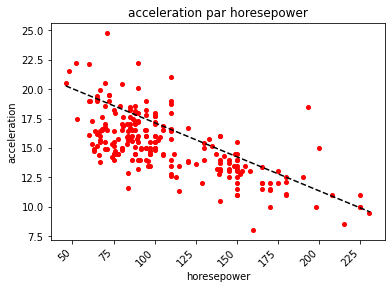

In [21]:
figure, axe = color_graph_background(1,1)

plt.xlabel(col_x)
plt.ylabel(col_y)
plt.plot(df[col_x], df[col_y], 'ro', markersize=4)
mini = min(df[col_x])
maxi = max(df[col_x]) + 1
# On affiche la droite entre 0 et 250
plt.plot([mini,maxi], [theta.item(0),theta.item(0) + maxi * theta.item(1)], linestyle='--', c='#000000')

#figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.title(col_y + ' par '+col_x)
plt.show()

In [14]:
def draw_regression2(df, col_x, col_y, col_group=None):
    figure, axe = color_graph_background(1,1)

    plt.xlabel(col_x)
    plt.ylabel(col_y)
    # On affiche les données nettoyées
    df.plot.scatter(col_x, col_y, c=col_group, colormap='viridis', ax=axe)

    mini = min(df[col_x])
    maxi = max(df[col_x]) + 1

    X = np.matrix([np.ones(df.shape[0]), df[col_x]]).T
    y = np.matrix(df[col_y]).T
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    axe.plot([mini,maxi], [theta.item(0),theta.item(0) + maxi * theta.item(1)], linestyle='--', c='#000000')

    figure.set_size_inches(16, 8, forward=True)
    plt.xticks(rotation=45, ha="right")
    plt.title(col_x + " " + col_y)
    plt.show()

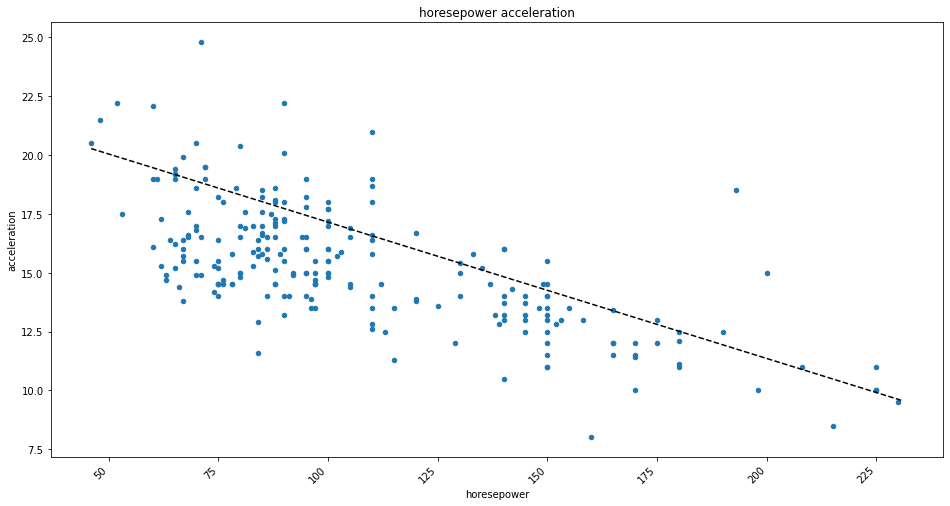

In [15]:
col_x = 'horesepower'
col_y = 'acceleration'
draw_regression2(df, col_x, col_y)

In [41]:
# Diviser le dataset entre train et test set
X = df[col_x].values.reshape(-1, 1)
y = df[col_y].values

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
# Entrainement du model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test)

In [46]:
regressor.score(X_test,y_test)

0.47294617320186805

Text(0.5, 0, 'acceleration')

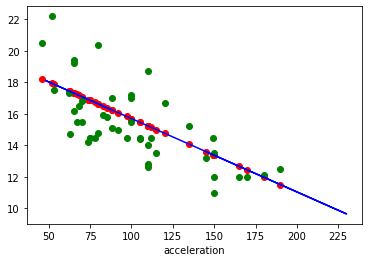

In [45]:
plt.scatter(X_test, y_pred, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('')
plt.xlabel(col_x)
plt.xlabel(col_y)

<AxesSubplot:>

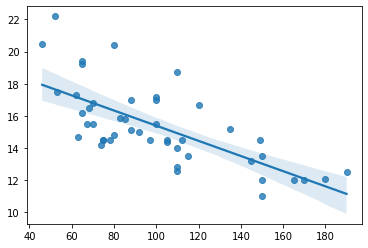

In [49]:
sns.regplot(x=X_test, y=y_test)

<AxesSubplot:>

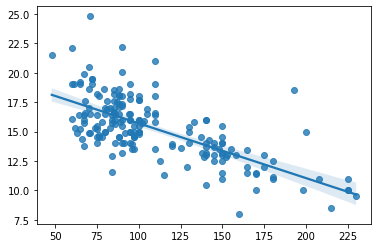

In [48]:
sns.regplot(x=X_train, y=y_train)

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


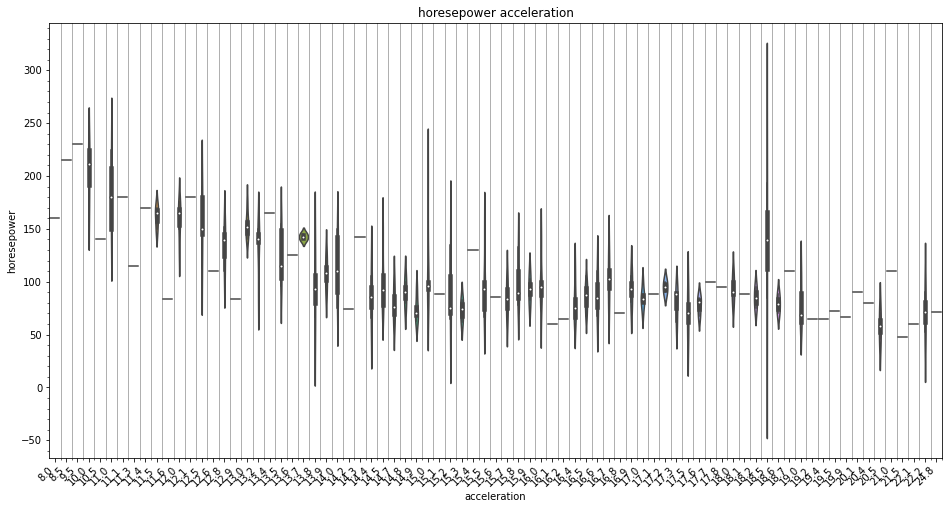

In [20]:
from matplotlib.ticker import AutoMinorLocator
figure, axe = color_graph_background(1,1)
ax1 = sns.violinplot(col_y, col_x, data=df, ax=axe)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)
figure.set_size_inches(16, 8, forward=True)
plt.xticks(rotation=45, ha="right")
plt.title(col_x + " " + col_y)
plt.show()